In [79]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import re
import os
import math

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
def add_f1(row):
    p = row['Precision']
    r = row['Recall']
    if r == 0.0:
        f1 = 0
    else:
        f1 = (2 * p * r)/(p + r)
    return f1


dirname = os.getcwd()
group_fields = ['ProtocolName', 'GroupValues']
metric = 'ROC_AUC'
#metric = 'f1'

classification_file = os.path.abspath(os.path.join(dirname, 
                                    'current_classifiers_hist.csv'))
adapt_cutoff_df = pd.read_csv(classification_file)
adapt_cutoff_df['f1'] = adapt_cutoff_df.apply(add_f1, axis=1)
adapt_cutoff_df.GroupValues.fillna('NA', inplace=True)
adapt_cutoff_df.Precision.fillna(0.0, inplace=True)
assert (not adapt_cutoff_df.isnull().values.any())
max_indices = adapt_cutoff_df.groupby(group_fields)[metric].idxmax()
adapt_cutoff_best_df=adapt_cutoff_df.loc[max_indices]
#adapt_cutoff_best_df.sort_values(group_fields)

In [81]:
adapt_cutoff_df.sort_values(group_fields)

,ProtocolName,LabelName,GroupValues,Size,Estimator,ROC_AUC,ClassificationPointType,Direction,Threshold,Accuracy,Precision,Recall,f1
18,5-HT Transporter,Ki,NA,166,Smile Bernoulli NB classification,0.852810,Inflection,UP,6.090346,0.734940,0.577778,0.896552,0.702703
19,5-HT Transporter,Ki,NA,166,Smile SVC Tanimoto classification,0.844349,Inflection,UP,6.090346,0.789157,0.688525,0.724138,0.705882
20,5-HT Transporter,Ki,NA,166,Weka RF on folded fp classification,0.833333,Inflection,UP,6.090346,0.746988,0.710526,0.465517,0.562500
21,5-HT Transporter,Ki,NA,166,Weka RF classification,0.830061,Inflection,UP,6.090346,0.759036,0.687500,0.568966,0.622642
22,5-HT Transporter,Ki,NA,166,Smile SVC Poly classification,0.823914,Inflection,UP,6.090346,0.650602,0.000000,0.000000,0.000000
23,5-HT Transporter,Ki,NA,166,Smile SVC RBF classification,0.745051,Inflection,UP,6.090346,0.753012,0.717949,0.482759,0.577320
168,5-HT1A,Ki,NA,265,Smile SVC Poly classification,0.860113,Inflection,UP,6.685859,0.720755,1.000000,0.038961,0.075000
169,5-HT1A,Ki,NA,265,Weka RF on folded fp classification,0.858041,Inflection,UP,6.685859,0.822642,0.826087,0.493506,0.617886
170,5-HT1A,Ki,NA,265,Smile SVC Tanimoto classification,0.839320,Inflection,UP,6.685859,0.803774,0.704918,0.558442,0.623188
171,5-HT1A,Ki,NA,265,Smile Bernoulli NB classification,0.820807,Inflection,UP,6.685859,0.622642,0.425806,0.857143,0.568966


In [82]:
adapt_cutoff_best_df.ClassificationPointType.value_counts()

Proportion    293
Minimum        32
Inflection     19
Name: ClassificationPointType, dtype: int64

In [83]:
adapt_cutoff_best_df = adapt_cutoff_best_df[adapt_cutoff_best_df.ClassificationPointType != 'Proportion']
adapt_cutoff_best_df

,ProtocolName,LabelName,GroupValues,Size,Estimator,ROC_AUC,ClassificationPointType,Direction,Threshold,Accuracy,Precision,Recall,f1
18,5-HT Transporter,Ki,NA,166,Smile Bernoulli NB classification,0.852810,Inflection,UP,6.090346,0.734940,0.577778,0.896552,0.702703
168,5-HT1A,Ki,NA,265,Smile SVC Poly classification,0.860113,Inflection,UP,6.685859,0.720755,1.000000,0.038961,0.075000
30,5-HT1B,Ki,NA,201,Smile Bernoulli NB classification,0.861167,Inflection,UP,6.246014,0.656716,0.488000,0.924242,0.638743
210,5-HT1D,Ki,NA,168,Smile SVC Poly classification,0.806818,Inflection,UP,6.488047,0.744048,1.000000,0.022727,0.044444
90,5-HT2,Ki,NA,121,Smile Bernoulli NB classification,0.938971,Minimum,UP,7.040404,0.801653,0.717949,0.965517,0.823529
204,5-HT2A,Ki,NA,319,Smile SVC RBF classification,0.892837,Minimum,UP,6.908200,0.824451,0.906977,0.619048,0.735849
156,5-HT2C,Ki,NA,282,Smile Bernoulli NB classification,0.870379,Minimum,UP,5.937201,0.769504,0.720930,0.879433,0.792332
0,5-HT6,Ki,NA,163,Weka RF classification,0.890769,Minimum,UP,6.148264,0.815951,0.788732,0.788732,0.788732
138,5-HT7,Ki,NA,169,Smile Bernoulli NB classification,0.855963,Minimum,UP,6.889028,0.704142,0.547170,0.966667,0.698795
354,AKT1,Activity Value,Assay Description:Inhibition of Akt|Activity T...,152,Smile Bernoulli NB classification,0.874886,Minimum,UP,7.454110,0.756579,0.617021,0.983051,0.758170


In [84]:
dirname = os.getcwd()
classification_file = os.path.abspath(os.path.join(dirname, 
                                    'current_classifiers_hist_fixed.csv'))
fixed_cutoff_df = pd.read_csv(classification_file)
fixed_cutoff_df['f1'] = fixed_cutoff_df.apply(add_f1, axis=1)
fixed_cutoff_df.GroupValues.fillna('NA', inplace=True)
#adapt_cutoff_df.Precision.fillna(0.0, inplace=True)
assert (not fixed_cutoff_df.isnull().values.any())
max_indices = fixed_cutoff_df.groupby(group_fields)[metric].idxmax
fixed_cutoff_best_df=fixed_cutoff_df.loc[max_indices]
#fixed_cutoff_best_df.sort_values(group_fields)

In [85]:
merged_df = adapt_cutoff_best_df.merge(fixed_cutoff_best_df, how='left', on=group_fields, validate='1:1', suffixes=('_a', '_f'))
#merged_df

In [86]:
merged_df.ROC_AUC_a.describe()

count    51.000000
mean      0.879682
std       0.085631
min       0.492920
25%       0.861947
50%       0.892837
75%       0.929753
max       0.981166
Name: ROC_AUC_a, dtype: float64

In [87]:
merged_df.ROC_AUC_f.describe()

count    51.000000
mean      0.870191
std       0.091406
min       0.466120
25%       0.844476
50%       0.890556
75%       0.913090
max       0.976130
Name: ROC_AUC_f, dtype: float64

0.04769622405120891

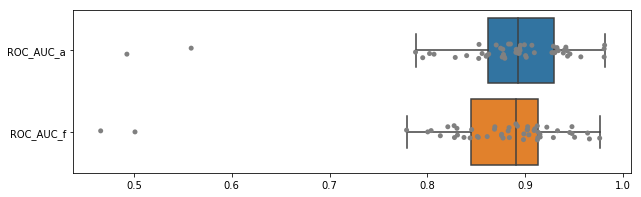

In [88]:
auc_df = merged_df[['ROC_AUC_a','ROC_AUC_f']]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
sns.boxplot(data=auc_df, orient='h', ax=axes, showfliers=False)
sns.stripplot(data=auc_df, orient='h', jitter=True, color='gray', ax=axes)
from scipy import stats
stats.ttest_rel(auc_df.ROC_AUC_a, auc_df.ROC_AUC_f).pvalue

/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


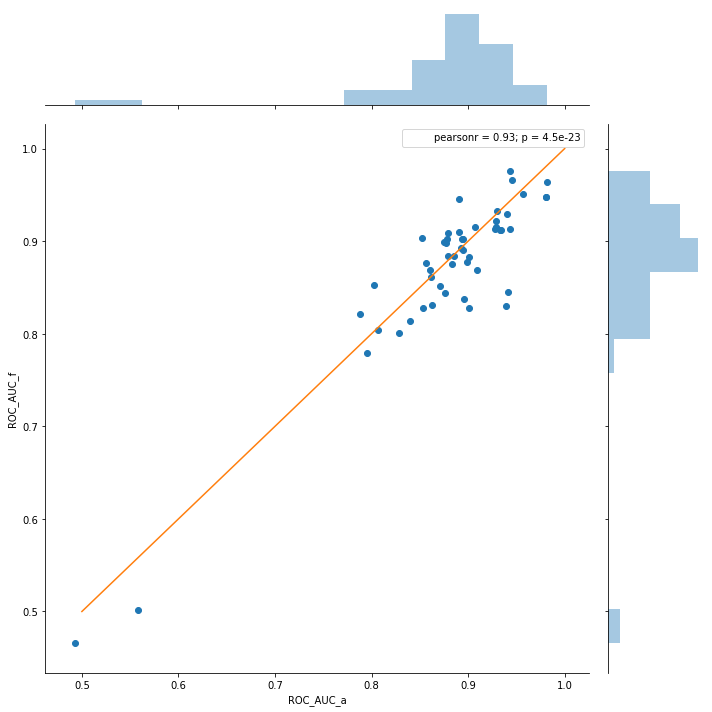

In [89]:
g = sns.jointplot(x="ROC_AUC_a", y="ROC_AUC_f", data=merged_df, size=10)
g.ax_joint.plot([0.5, 1], [0.5, 1])
plt.show()

In [90]:
merged_df['f1_a'].describe()

count    51.000000
mean      0.730902
std       0.166431
min       0.044444
25%       0.696620
50%       0.758170
75%       0.831921
max       0.924242
Name: f1_a, dtype: float64

In [91]:
merged_df['f1_f'].describe()

count    51.000000
mean      0.635852
std       0.243743
min       0.000000
25%       0.657740
50%       0.706587
75%       0.777778
max       0.847059
Name: f1_f, dtype: float64

0.0004380614463793452

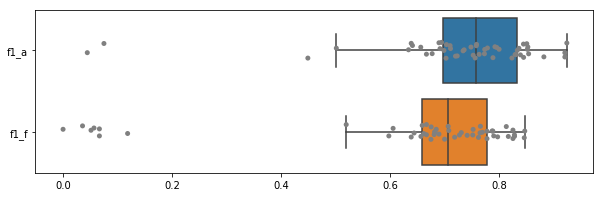

In [92]:
f1_df = merged_df[['f1_a','f1_f']]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
sns.boxplot(data=f1_df, orient='h', ax=axes, showfliers=False)
sns.stripplot(data=f1_df, orient='h', jitter=True, color='gray', ax=axes)
from scipy import stats
stats.ttest_rel(f1_df.f1_a, f1_df.f1_f).pvalue

/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


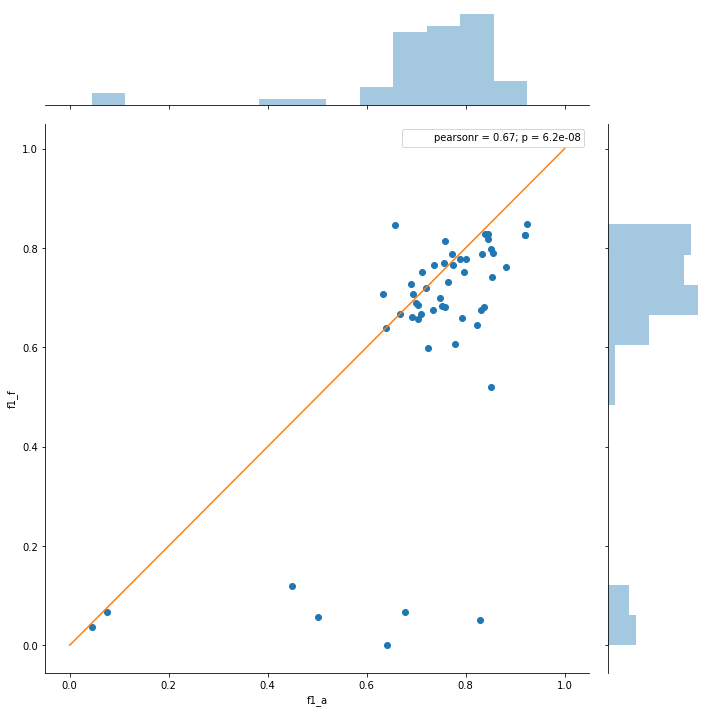

In [93]:
g = sns.jointplot(x="f1_a", y="f1_f", data=merged_df, size=10)
g.ax_joint.plot([0, 1], [0, 1])
plt.show()